In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras                                     #for leaky_relu
from sklearn.metrics import confusion_matrix

# Loading mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [ ]:
np.random.seed(0)

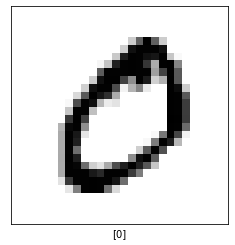

In [ ]:
# displaying one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [ ]:
# splitting training and testing data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [ ]:

model = tf.keras.Sequential()
# Dfine the input shape in the first layer of the neural network

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation = keras.layers.LeakyReLU(alpha=0.01))) 

# leaky relu gave higher accuracy

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# softmax in output layer cause we have to categorize multiple classes of objects i.e. different digits


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 32)         

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# no clue what sparse categorical cross entropy is, should read


In [ ]:
#Reshape for CNN 
x_train = x_train.reshape(-1,28, 28,1)
x_test = x_test.reshape(-1,28, 28, 1)

In [ ]:
print("The wheels on the bus go round and round")
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
700/700 [==============================] - 78s 111ms/step - loss: 0.3890 - accuracy: 0.8752 - val_loss: 0.1165 - val_accuracy: 0.9649
Epoch 2/10
700/700 [==============================] - 73s 105ms/step - loss: 0.1564 - accuracy: 0.9513 - val_loss: 0.0744 - val_accuracy: 0.9773
Epoch 3/10
700/700 [==============================] - 69s 99ms/step - loss: 0.1175 - accuracy: 0.9635 - val_loss: 0.0647 - val_accuracy: 0.9801
Epoch 4/10
700/700 [==============================] - 79s 113ms/step - loss: 0.0968 - accuracy: 0.9700 - val_loss: 0.0614 - val_accuracy: 0.9803
Epoch 5/10
700/700 [==============================] - 75s 108ms/step - loss: 0.0809 - accuracy: 0.9743 - val_loss: 0.0512 - val_accuracy: 0.9841
Epoch 6/10
700/700 [==============================] - 64s 91ms/step - loss: 0.0745 - accuracy: 0.9763 - val_loss: 0.0461 - val_accuracy: 0.9856
Epoch 7/10
700/700 [==============================] - 61s 88ms/step - loss: 0.0681 - accuracy: 0.9781 - val_loss: 0.0454 - val_accur

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9897000193595886


In [ ]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 4s 11ms/step


array([7.5953138e-10, 1.9183581e-07, 2.3682408e-06, 3.7265613e-06,
       1.2492913e-11, 7.8171125e-10, 1.2232241e-16, 9.9999064e-01,
       1.7543006e-09, 3.0288122e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
x_test = x_test.reshape(-1,28, 28)   # -1 in reshape implies we do not know the exact dimension of the array, numpy reshapes it according to the remaining parameters i.e 28,28
x_test.shape

(10000, 28, 28)

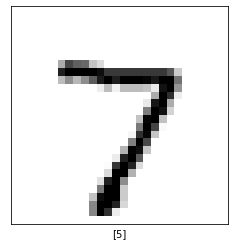

In [ ]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)


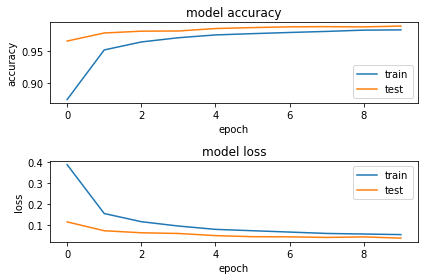

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)

# for Keras 2.3.0 and upwards this
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()



In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

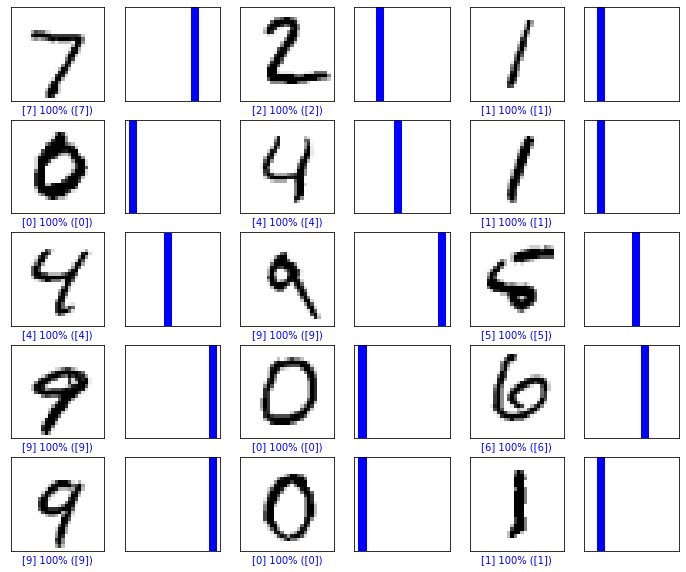

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [ ]:
conf = confusion_matrix(y_test, np.argmax(predictions,axis=1))
conf

array([[ 976,    0,    0,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1134,    1,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1, 1026,    0,    1,    0,    0,    3,    0,    0],
       [   0,    0,    5, 1000,    0,    3,    0,    1,    1,    0],
       [   0,    0,    0,    0,  974,    0,    1,    0,    0,    7],
       [   1,    0,    1,    9,    0,  878,    2,    1,    0,    0],
       [   4,    3,    0,    0,    1,    4,  944,    0,    2,    0],
       [   0,    3,    7,    1,    0,    0,    0, 1013,    1,    3],
       [   6,    0,    1,    1,    1,    0,    0,    1,  957,    7],
       [   1,    2,    0,    4,    3,    2,    0,    1,    1,  995]])